In [19]:
#opening the dataset
import pandas as pd
df = pd.read_csv('BankNote_Authentication.csv')
display(df.head())
display(df.tail())

classes = df['class']
features = df.drop('class', axis=1)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [20]:
import visuals as vs

In [21]:
n_records = len(df)
n_fake_notes = len(df[df['class'] == 1])
n_real_notes = len(df[df['class'] == 2])
print("Total number of records: {}".format(n_records))
print("Total number of fake notes: {}".format(n_fake_notes))
print("Total number of real notes: {}".format(n_real_notes))

missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("\nThere are no missing values in the dataset")
else:
    print("\nThe dataset has {} missing values".format(missing_values))
    
print(df.isnull().sum())

Total number of records: 1372
Total number of fake notes: 610
Total number of real notes: 0

There are no missing values in the dataset
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [22]:
#dimension of the dataset
df.shape

(1372, 5)

In [23]:
#Index object representing the column labels of the DataFrame
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [24]:
display(df.describe())

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [25]:
#setting maplotlib to show plots in the notebook and ingoring warnings
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Model 1 - Here I take only the variables variance and skewness to be considered for clustering

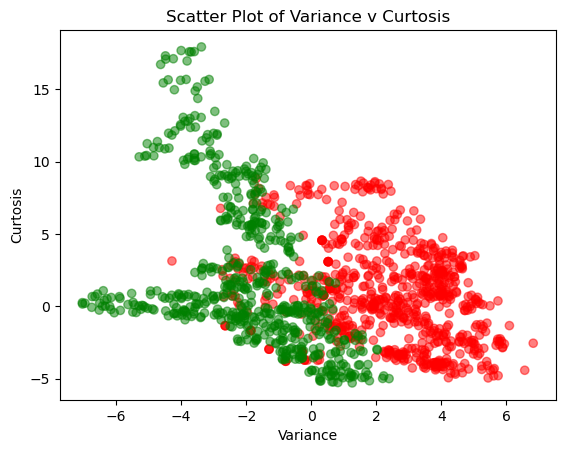

In [26]:
colors = {'0': 'red', '1': 'green'}

plt.scatter(df.variance, df.curtosis, alpha=0.5, c=df['class'].apply(lambda x: colors[str(x)]))

plt.title('Scatter Plot of Variance v Curtosis')
plt.xlabel('Variance')
plt.ylabel('Curtosis')
plt.show()

There is no obvious cluster in spherical shapes. So, K means clustering won't fit perfectly here.

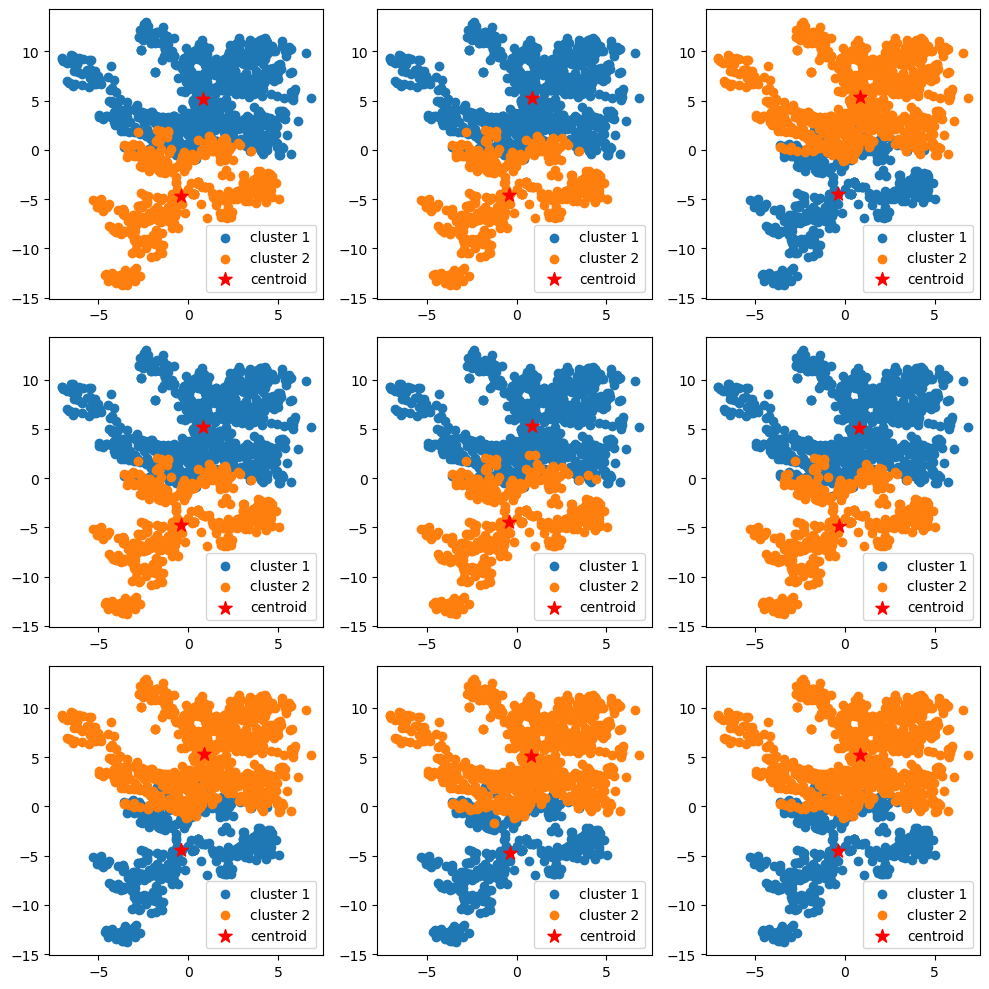

In [27]:
import numpy as np
from sklearn.cluster import KMeans

n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(10,10))
ax = np.ravel(ax)
for i in range(n_iter):
  km = KMeans(n_clusters=2,max_iter=3)
  km.fit(df)
  centroids=km.cluster_centers_
  ax[i].scatter(df[km.labels_== 0]['variance'], df[km.labels_ == 0]['skewness'],label='cluster 1')
  ax[i].scatter(df[km.labels_ == 1]['variance'], df[km.labels_ == 1]['skewness'],label='cluster 2')
  ax[i].scatter(centroids[:, 0], centroids[:, 1],c='r', marker='*', s=100, label='centroid')
  ax[i].legend()
  plt.tight_layout();

After running K-Means 9 times, the results we got are very similar, which means the K-Means here are stable.

Predicted clusters

In [28]:
df1=df.copy()
df1.drop(['curtosis','entropy','class'],axis=1,inplace=True)
df1.head()

,variance,skewness
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [29]:
clusters = KMeans(2)
clusters.fit(df1)
df1['clusterid'] = clusters.labels_

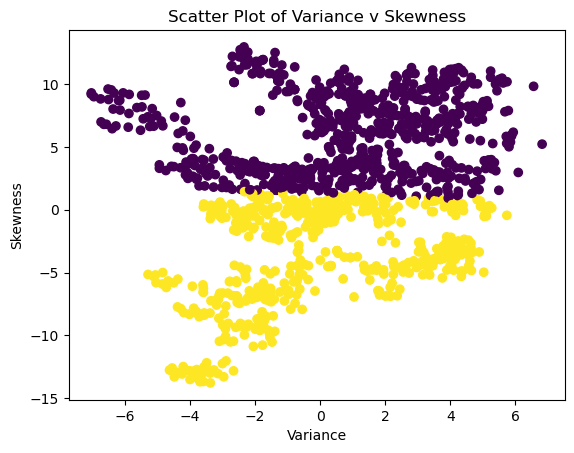

In [30]:
plt.scatter(df1['variance'], df1['skewness'], c=df1['clusterid'])
plt.title('Scatter Plot of Variance v Skewness')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.show()

In [31]:
clusters.cluster_centers_

array([[ 0.85317605,  6.07284596],
       [-0.11726706, -3.52998064]])

In [32]:
df1.head()

,variance,skewness,clusterid
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,1
3,3.45660,9.5228,0
4,0.32924,-4.4552,1


In [33]:
df1.groupby( 'clusterid' ).describe()

variance                                                          \
             count      mean       std     min       25%       50%     75%   
clusterid                                                                    
0            780.0  0.857131  2.908209 -7.0421 -0.969315  1.085100  3.1930   
1            592.0 -0.124118  2.655287 -5.2943 -2.200500 -0.651195  2.0156   

                  skewness                                                  \
              max    count      mean       std      min       25%      50%   
clusterid                                                                    
0          6.8248    780.0  6.066251  3.114927   0.9291  3.223400  6.12200   
1          5.7403    592.0 -3.537513  3.820182 -13.7731 -6.321125 -3.05325   

                              
                75%      max  
clusterid                     
0          8.781000  12.9516  
1         -0.097265   1.4671

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df1 = scaler.fit_transform( df1[["variance", "skewness"]] ) 
scaled_df1[0:5]

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       [ 1.06374236,  1.29547754],
       [-0.03677175, -1.0870383 ]])

In [35]:
scaled_df1=pd.DataFrame(scaled_df1,columns=['variance','skewness'])
scaled_df1

,variance,skewness
0,1.121806,1.149455
1,1.447066,1.064453
2,1.207810,-0.777352
3,1.063742,1.295478
4,-0.036772,-1.087038
...,...,...
1367,-0.009711,-0.097693
1368,-0.641313,-1.158984
1369,-1.472357,-2.621646
1370,-1.406693,-1.756471


In [36]:
clusters_new = KMeans( 2, random_state=42 ) 
clusters_new.fit( scaled_df1 ) 
df1["clusterid_new"] = clusters_new.labels_ 
df1.head()

,variance,skewness,clusterid,clusterid_new
0,3.62160,8.6661,0,1
1,4.54590,8.1674,0,1
2,3.86600,-2.6383,1,1
3,3.45660,9.5228,0,1
4,0.32924,-4.4552,1,0


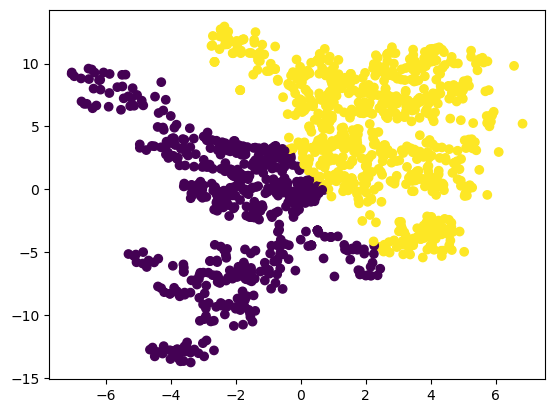

In [37]:
plt.scatter(df1['variance'],df1['skewness'],c=df1['clusterid_new'])
plt.show()

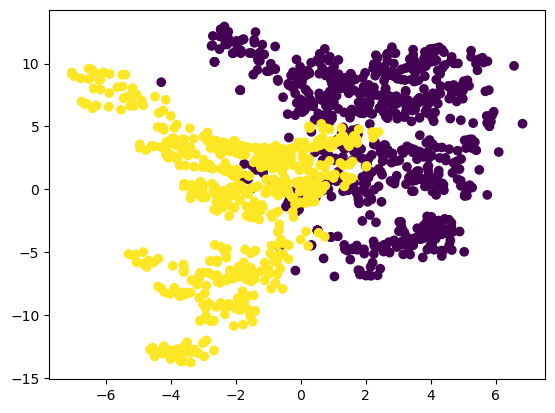

In [39]:
#visualizing the data with correct labels
plt.scatter(df['variance'],df['skewness'],c=df['class'])
plt.show()

In [ ]:
clusters_new.cluster_centers_

In [ ]:
df1["clusterid_new"] = df1["clusterid_new"].map({0: 1, 1: 0})

In [ ]:
df1.shape

In [ ]:
df1=df1.reset_index()
df1

In [ ]:
correct=0
for i in range(0,1371):
  if df['Class'][i]==df1['clusterid_new'][i]:
   correct=correct+1

print(correct/1371)

Model 2 - I use PCA to reduce the number of features and hence to segment the data

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaled_df2 = scaler.fit_transform( df[["variance", "skewness","curtosis","entropy"]] ) 
scaled_df2[0:5]

In [ ]:
scaled_df2=pd.DataFrame(scaled_df2,columns=['variance','skewness',"curtosis","entropy"])
scaled_df2

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_df2)
PCA_df=pd.DataFrame(pca.transform(scaled_df2),columns=(['col1','col2']))
PCA_df.head()

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(PCA_df['col1'],PCA_df['col2'])
plt.title('Scatter Plot of col1 vs col2')
plt.show()

In [ ]:
cluster_range=range(1,11)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(PCA_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))
plt.plot(cluster_range,cluster_errors,marker='o')
plt.title('Elbow method to find the number of clusters')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

AC=AgglomerativeClustering(n_clusters=4)
AC.fit(PCA_df)

yhat_AC=AC.fit_predict(PCA_df)
yhat_AC

In [ ]:
PCA_df['Clusters']=yhat_AC
PCA_df

In [ ]:
plt.scatter(PCA_df['col1'],PCA_df['col2'],c=PCA_df['Clusters'])
plt.show()

Training Of Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# load dataset
df = pd.read_csv('banknote-authentication_csv.csv')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class',axis=1), df['Class'], test_size=0.2)

# build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# set up a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Testing set accuracy: {accuracy}')

# save the final model
model.save('model.h5')


In [ ]:
def detect_image(predicted_class):
    # Load image 
    image = cv2.imread('5Dollar_42_jpg.rf.b1978b81a3afed467266294ced460423.jpg')

    # Check if image has been loaded correctly
    if image is None:
        print("Error: Could not load image")
        return
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.GaussianBlur(gray, (21, 21), 0)

    fig, ax = plt.subplots(figsize=(10, 10))
    heatmap = ax.imshow(gray_blur, cmap='inferno')
    fig.colorbar(heatmap, ax=ax)

    # Display the heatmap
    plt.show()

    # Apply adaptive thresholding to get binary image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Find contours in the binary image
    ret, thresh = cv2.threshold(gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    #contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on original image
        # Calculate spread of largest contour
    max_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(max_contour)
    spread = w / h

    # Draw contours on original image
    img_copy = image.copy()
    if predicted_class<=0.5:
        colors_tuple = (0, 0, 255)
    else:
        colors_tuple = (0, 255, 0)
    cv2.drawContours(img_copy, contours, -1, colors_tuple, 2)
    print("Number of contours found:", len(contours))
    print("Spread of largest contour:", spread)


    # Display the image with detected contours
    cv2.namedWindow("Detected Contours", cv2.WINDOW_NORMAL)
    cv2.resizeWindow("Detected Contours", img_copy.shape[1], img_copy.shape[0])
    cv2.imshow("Detected Contours", img_copy)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
import cv2

def preprocess_image(image):
    # Resize the image to 64x64 pixels
    resized_image = cv2.resize(image, (64, 64))
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    # Flatten the image to a 1D array
    flattened_image = gray_image.flatten()
    # Normalize the image by dividing each pixel value by 255
    normalized_image = flattened_image / 255.0
    # Add two extra zeros to the end of the flattened image to make it a 1D array of four features
    feature_vector = np.concatenate([normalized_image, [0, 0]])
    # Return the flattened array of four features
    return feature_vector

from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(4098,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Load the image
image = cv2.imread('5Dollar_42_jpg.rf.b1978b81a3afed467266294ced460423.jpg') #enter path and reload this block 
# Preprocess the image
feature_vector = preprocess_image(image)
# Reshape the feature vector to match the expected input shape of the model
feature_vector = feature_vector.reshape(1, -1)
# Pass the feature vector to the model and get the predicted class
predicted_class = model.predict(feature_vector)[0][0]
predicted_prob_percent = round(predicted_class * 100, 3)
# Output the predicted probability
print("The predicted probability is: {}%".format(predicted_prob_percent))
# output the prediction
if predicted_class <= 0.5: # it should be 0.5 because of the mean value of the training model.
    print("Fake note")
else:
    print("Real note")

detect_image(predicted_class)